In [1]:
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

# 1. Group the user ratings based on movieId and apply aggregation operations
ratings_grouped = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
ratings_grouped.columns = ['rating_count', 'rating_mean']

# 2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1
merged_df = pd.merge(movies_df, ratings_grouped, how='inner', left_on='movieId', right_index=True)

# 3. Filter only those movies which have more than 50 user ratings
filtered_movies = merged_df[merged_df['rating_count'] > 50]

# Display the resulting DataFrame
print(filtered_movies.head())


   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [2]:
unique_user_count = ratings_df['userId'].nunique()
print("Number of unique userId in ratings.csv:", unique_user_count)


Number of unique userId in ratings.csv: 610


In [3]:
# Find the movie with the maximum number of user ratings
max_ratings_movie = filtered_movies[filtered_movies['rating_count'] == filtered_movies['rating_count'].max()]

# Display the result
print("Movie with the maximum number of user ratings:")
print(max_ratings_movie[['title', 'rating_count']])


Movie with the maximum number of user ratings:
                   title  rating_count
314  Forrest Gump (1994)           329


In [4]:
# Load the tags dataset
tags_df = pd.read_csv('tags.csv')

# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags for the specific movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

# Display the result
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags[['userId', 'tag']])


Tags for 'Matrix, The (1999)':
      userId                 tag
815      424        martial arts
816      424              sci-fi
1646     474  alternate universe
2794     537          philosophy
2795     537    post apocalyptic


In [6]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter the ratings for the specific movieId
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]

# Calculate the average user rating
average_rating = terminator_ratings['rating'].mean()

# Display the result
print("Average user rating for 'Terminator 2: Judgment Day (1991)':", average_rating)


Average user rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


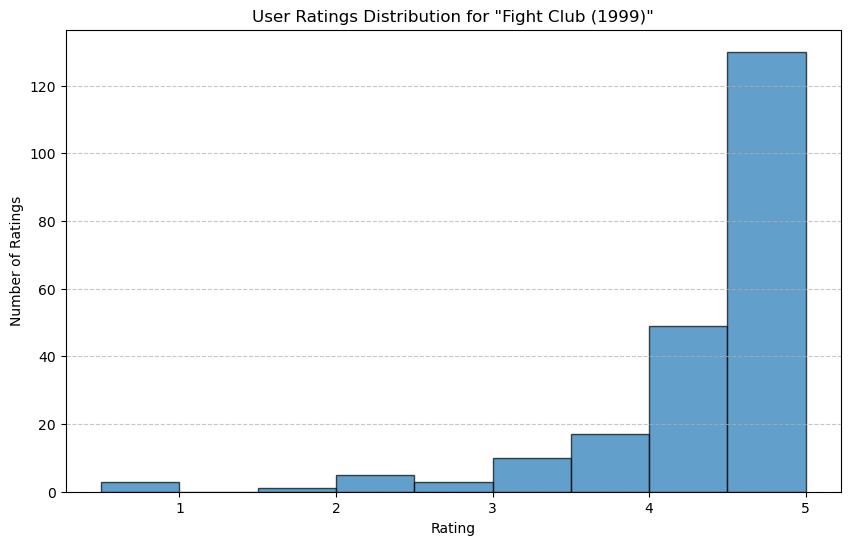

In [7]:
import matplotlib.pyplot as plt

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter the ratings for the specific movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=9, edgecolor='black', alpha=0.7)
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [8]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_movies[filtered_movies['rating_mean'] == filtered_movies['rating_mean'].max()]

# Display the result
print("Most Popular Movie based on Average User Ratings:")
print(most_popular_movie[['title', 'rating_mean']])


Most Popular Movie based on Average User Ratings:
                                title  rating_mean
277  Shawshank Redemption, The (1994)     4.429022


In [9]:
# Sort the filtered_movies DataFrame by rating_count in descending order
top5_popular_movies = filtered_movies.sort_values(by='rating_count', ascending=False).head(5)

# Display the result
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top5_popular_movies[['title', 'rating_count']])


Top 5 Popular Movies based on Number of User Ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1939                Matrix, The (1999)           278


In [10]:
# Filter Sci-Fi movies from the filtered_movies DataFrame
sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by rating_count in descending order
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

# Select the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]

# Display the result
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])


Third Most Popular Sci-Fi Movie based on Number of User Ratings:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [11]:
import pandas as pd

# Load the movies.csv file into a DataFrame
movies_df = pd.read_csv('movies.csv')

# Display the first few rows of the DataFrame
print(movies_df.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
